# Introduction to Autoencoders

Autoencoders are a class of artificial neural networks used in unsupervised machine learning and data compression tasks. They are designed to learn efficient representations of data by encoding the input into a lower-dimensional latent space and then decoding it back to the original data format. In essence, autoencoders aim to reconstruct their own input data while learning a compact and informative representation.

![Autoencoder Diagram](https://upload.wikimedia.org/wikipedia/commons/2/28/Autoencoder_structure.png)

## Components of an Autoencoder

Autoencoders consist of two primary components:

1. **Encoder**: This component compresses the input data into a lower-dimensional representation. It typically consists of one or more neural network layers that learn to extract relevant features from the input.

2. **Decoder**: The decoder takes the encoded representation and attempts to reconstruct the original data from it. It essentially learns to generate data similar to the input from the reduced representation.

## Working Principle

1. **Encoding**: The input data, such as images, text, or numerical data, is fed into the encoder, which maps it to a lower-dimensional representation in the latent space. This lower-dimensional representation is often referred to as the "bottleneck."

2. **Decoding**: The decoder takes this bottleneck representation and generates an output that should closely resemble the input data. The decoder's output is compared to the original input during training using a loss function, such as Mean Squared Error (MSE).

3. **Training**: During training, the autoencoder's goal is to minimize the reconstruction error between the input and the decoder's output. This process encourages the encoder to learn meaningful features that capture essential information in the data.

## Applications of Autoencoders

Autoencoders find applications in various domains:
1. **Dimentionality Reduction**: Autoencoders can learn non-linear relationships and, therefore, perform better in dimensionality reduction then other techniques like PCA.

![Autoencoder Diagram](https://lh6.googleusercontent.com/RvC-mbWbLG3jpGW3KnOcAMO7NjfRWJW4hjuaF86UXzp4YvWZIj0WSCOZUnmq5SLZ5PocH4NEomudO_Xpm4GzDTF0ZeweK43gXw3PoBunIgmrjfqDNicdIPIJbhzLUajtuSjTzSLbDDY7Q9i6On012tEwUuUhTA4jQ7xAY_GVC5vvkRLly9Dt4lhfkQ)

2. **Image Compression**: Autoencoders can be used for image compression by learning a compact representation of images, reducing storage requirements.

3. **Anomaly Detection**: They are employed for anomaly detection in data, as they can learn to reconstruct normal data and flag anomalies when reconstruction errors are high.

4. **Image Denoising**: Autoencoders can remove noise from images by learning to reconstruct clean versions from noisy inputs.

![Autoencoder Diagram](https://lh5.googleusercontent.com/elia6CWUSe2A_o_oeNIphxJz5Z7hxWdhEVbmSMMyvb3ciy9B0TBmExorjK6ULzDPbrhoFUe7kZgbAP9iwONKAun-2sKlu8EsLMa6WaCSYXcaglGWhJj_d1u_J5XzDmkGNnIWwbYvEotcA5LJgE8vu8Bi4Uo7fwpW-b-DlPJUpJJ9vYcUe1XQUCvC3w)

5. **Feature Learning**: They are used for feature learning and dimensionality reduction in machine learning pipelines.

6. **Recommendation Systems**: Autoencoders can help in building recommendation systems by learning user-item interactions.

7. **Generative Models**: Variational autoencoders (VAEs) and GANs (Generative Adversarial Networks) are extensions of autoencoders used for generating new data samples, such as images, text, or music.

Autoencoders are a versatile and powerful tool in the field of deep learning, offering a wide range of applications in data analysis, compression, and generation. In this notebook, we will explore how to build and train autoencoders for various tasks, providing practical examples and code to demonstrate their capabilities.


## Normal Autoencoder Architecture

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

Epoch 1/10

469/469 [==============================] - 37s 77ms/step - loss: 0.1690 - val_loss: 0.0907

Epoch 2/10

469/469 [==============================] - 39s 83ms/step - loss: 0.0869 - val_loss: 0.0827

Epoch 3/10

469/469 [==============================] - 39s 83ms/step - loss: 0.0817 - val_loss: 0.0794

Epoch 4/10

469/469 [==============================] - 36s 77ms/step - loss: 0.0791 - val_loss: 0.0772

Epoch 5/10

469/469 [==============================] - 40s 85ms/step - loss: 0.0771 - val_loss: 0.0757

Epoch 6/10

469/469 [==============================] - 37s 80ms/step - loss: 0.0759 - val_loss: 0.0749

Epoch 7/10

469/469 [==============================] - 36s 77ms/step - loss: 0.0751 - val_loss: 0.0741

Epoch 8/10

469/469 [==============================] - 37s 78ms/step - loss: 0.0744 - val_loss: 0.0734

Epoch 9/10

469/469 [==============================] - 39s 83ms/step - loss: 0.0739 - val_loss: 0.0730

Epoch 10/10

469/469 [==============================] - 47s 99ms

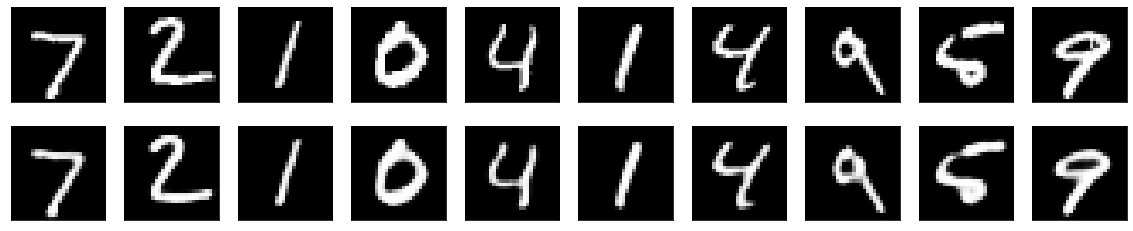

In [3]:

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to (samples, height, width, channels)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Define the autoencoder architecture
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Reconstruct images
reconstructed_images = autoencoder.predict(x_test)

# Plot original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


## Denoising Using Autoencoder

Epoch 1/10

469/469 [==============================] - 67s 142ms/step - loss: 0.1763 - val_loss: 0.1227

Epoch 2/10

469/469 [==============================] - 73s 156ms/step - loss: 0.1171 - val_loss: 0.1123

Epoch 3/10

469/469 [==============================] - 72s 154ms/step - loss: 0.1111 - val_loss: 0.1081

Epoch 4/10

469/469 [==============================] - 71s 151ms/step - loss: 0.1080 - val_loss: 0.1057

Epoch 5/10

469/469 [==============================] - 75s 159ms/step - loss: 0.1060 - val_loss: 0.1040

Epoch 6/10

469/469 [==============================] - 75s 160ms/step - loss: 0.1045 - val_loss: 0.1029

Epoch 7/10

469/469 [==============================] - 68s 144ms/step - loss: 0.1034 - val_loss: 0.1018

Epoch 8/10

469/469 [==============================] - 66s 141ms/step - loss: 0.1025 - val_loss: 0.1021

Epoch 9/10

469/469 [==============================] - 78s 166ms/step - loss: 0.1018 - val_loss: 0.1005

Epoch 10/10

469/469 [==============================] -

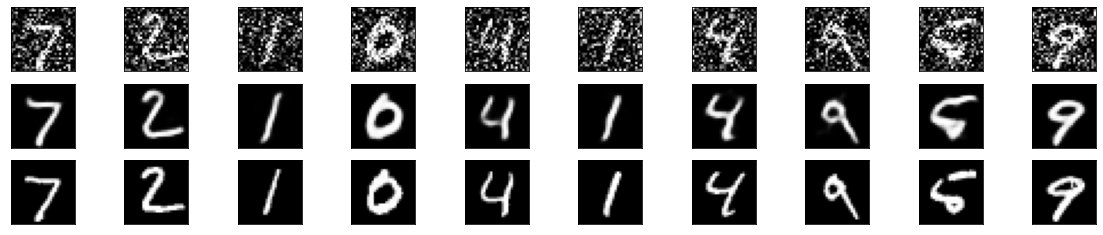

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add Gaussian noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip pixel values to stay within [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Reshape the data to (samples, height, width, channels)
x_train_noisy = np.reshape(x_train_noisy, (len(x_train_noisy), 28, 28, 1))
x_test_noisy = np.reshape(x_test_noisy, (len(x_test_noisy), 28, 28, 1))

# Define the denoising autoencoder architecture
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the denoising autoencoder
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))

# Denoise images
denoised_images = autoencoder.predict(x_test_noisy)

# Plot noisy and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


## Feature Extraction Using Autoencoder

Epoch 1/50

235/235 [==============================] - 1s 5ms/step - loss: 0.2431 - val_loss: 0.1619

Epoch 2/50

235/235 [==============================] - 1s 5ms/step - loss: 0.1442 - val_loss: 0.1275

Epoch 3/50

235/235 [==============================] - 1s 5ms/step - loss: 0.1191 - val_loss: 0.1095

Epoch 4/50

235/235 [==============================] - 1s 6ms/step - loss: 0.1047 - val_loss: 0.0982

Epoch 5/50

235/235 [==============================] - 1s 6ms/step - loss: 0.0953 - val_loss: 0.0906

Epoch 6/50

235/235 [==============================] - 1s 6ms/step - loss: 0.0888 - val_loss: 0.0852

Epoch 7/50

235/235 [==============================] - 1s 5ms/step - loss: 0.0842 - val_loss: 0.0816

Epoch 8/50

235/235 [==============================] - 1s 5ms/step - loss: 0.0811 - val_loss: 0.0791

Epoch 9/50

235/235 [==============================] - 2s 7ms/step - loss: 0.0791 - val_loss: 0.0775

Epoch 10/50

235/235 [==============================] - 1s 5ms/step - loss: 0.0776

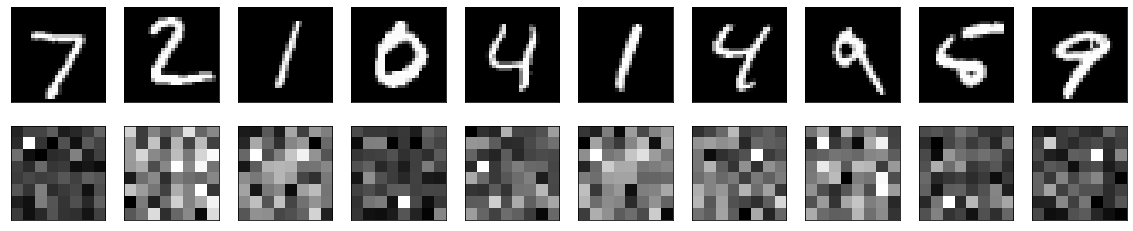

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense

# Load the MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


#import input image
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#fit it
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, 
validation_data=(x_test, x_test))


#output of encoder i.e. features
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the encoded feature vector
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(encoded_imgs[i].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Dimensionality Reduction using PCA 

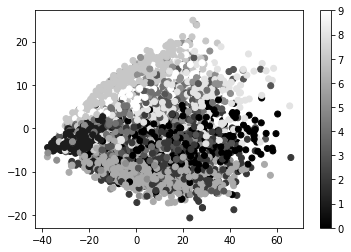

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
encoded_pca = pca.fit_transform(encoded_imgs)

plt.scatter(encoded_pca[:, 0], encoded_pca[:, 1], c=y_test)
plt.colorbar()
plt.show()


## Dimensionality Reduction using t-SNE 

<IPython.core.display.Javascript object>

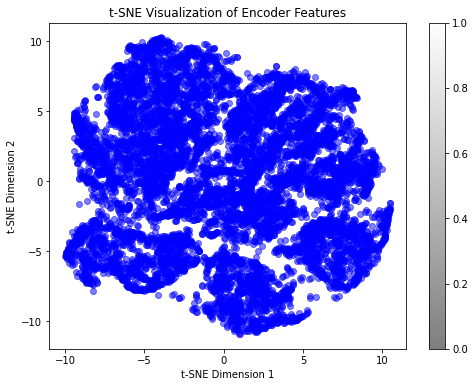

In [20]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(encoded_imgs)

# Visualize the t-SNE-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c='b', cmap='viridis', marker='o', alpha=0.5)
plt.title('t-SNE Visualization of Encoder Features')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()
plt.show()

## Classification using Autoencoder

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

input_dim = 784
x_train = x_train.reshape(-1, input_dim)
x_test = x_test.reshape(-1, input_dim)

encoding_dim = 32
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

# Compile autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')



autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


#find output from encoder after training 

encoder = Model(input_img, encoded)
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)

clf_input_dim = encoding_dim
clf_output_dim = 10
clf_input = Input(shape=(clf_input_dim,))
clf_output = Dense(clf_output_dim, activation='softmax')(clf_input)
classifier = Model(clf_input, clf_output)

# Compile classifier
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train, num_classes=clf_output_dim)
y_test_categorical = to_categorical(y_test, num_classes=clf_output_dim)
classifier.fit(x_train_encoded, y_train_categorical,
               epochs=50,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test_encoded, y_test_categorical))

Epoch 1/50

235/235 [==============================] - 1s 5ms/step - loss: 0.2741 - val_loss: 0.1884

Epoch 2/50

235/235 [==============================] - 1s 5ms/step - loss: 0.1691 - val_loss: 0.1521

Epoch 3/50

235/235 [==============================] - 1s 5ms/step - loss: 0.1432 - val_loss: 0.1328

Epoch 4/50

235/235 [==============================] - 1s 5ms/step - loss: 0.1277 - val_loss: 0.1206

Epoch 5/50

235/235 [==============================] - 2s 7ms/step - loss: 0.1175 - val_loss: 0.1123

Epoch 6/50

235/235 [==============================] - 1s 6ms/step - loss: 0.1106 - val_loss: 0.1069

Epoch 7/50

235/235 [==============================] - 1s 4ms/step - loss: 0.1057 - val_loss: 0.1025

Epoch 8/50

235/235 [==============================] - 1s 5ms/step - loss: 0.1021 - val_loss: 0.0995

Epoch 9/50

235/235 [==============================] - 1s 5ms/step - loss: 0.0995 - val_loss: 0.0972

Epoch 10/50

235/235 [==============================] - 1s 4ms/step - loss: 0.0977

## Anomaly Detection Using Autoencoder

Epoch 1/50

2/2 [==============================] - 0s 2ms/step - loss: 0.0928

Epoch 2/50

2/2 [==============================] - 0s 2ms/step - loss: 0.0919

Epoch 3/50

2/2 [==============================] - 0s 2ms/step - loss: 0.0912

Epoch 4/50

2/2 [==============================] - 0s 2ms/step - loss: 0.0905

Epoch 5/50

2/2 [==============================] - 0s 2ms/step - loss: 0.0899

Epoch 6/50

2/2 [==============================] - 0s 4ms/step - loss: 0.0893

Epoch 7/50

2/2 [==============================] - 0s 2ms/step - loss: 0.0888

Epoch 8/50

2/2 [==============================] - 0s 2ms/step - loss: 0.0884

Epoch 9/50

2/2 [==============================] - 0s 3ms/step - loss: 0.0880

Epoch 10/50

2/2 [==============================] - 0s 2ms/step - loss: 0.0876

Epoch 11/50

2/2 [==============================] - 0s 4ms/step - loss: 0.0873

Epoch 12/50

2/2 [==============================] - 0s 2ms/step - loss: 0.0870

Epoch 13/50

2/2 [==============================]

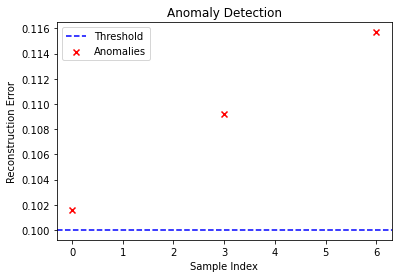

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Generate random normal data
np.random.seed(0)
normal_data = np.random.rand(100, 32)  # 100 samples of normal data

# Generate random anomalous data
np.random.seed(1)
anomalous_data = np.random.rand(10, 32)  # 10 samples of anomalous data

# Define the autoencoder architecture
input_shape = len(normal_data[0])
encoding_dim = 16
epochs = 50
batch_size = 64

input_data = Input(shape=(input_shape,))
encoded = Dense(encoding_dim, activation='relu')(input_data)
decoded = Dense(input_shape, activation='sigmoid')(encoded)

autoencoder = Model(input_data, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder using only normal data
autoencoder.fit(normal_data, normal_data, epochs=epochs, batch_size=batch_size, shuffle=True)

# Reconstruct both normal and anomalous data
reconstructed_normal_data = autoencoder.predict(normal_data)
reconstructed_anomalous_data = autoencoder.predict(anomalous_data)

# Calculate reconstruction errors
mse_normal = np.mean(np.square(normal_data - reconstructed_normal_data), axis=1)
mse_anomalous = np.mean(np.square(anomalous_data - reconstructed_anomalous_data), axis=1)

# Set a threshold (e.g., using statistical methods or domain knowledge)
threshold = 0.1

# Identify anomalies
anomalies = np.where(mse_anomalous > threshold)[0]

print("Anomalies:", anomalies)

# Visualize anomalous points
plt.scatter(anomalies, mse_anomalous[anomalies], c='r', marker='x', label='Anomalies')
plt.axhline(y=threshold, color='b', linestyle='--', label='Threshold')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Anomaly Detection')
plt.legend()
plt.show()
